In [33]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
import cv2
import random
import time
%matplotlib inline
start = 0
end = 0
# from matplotlib.font_manager import FontProperties
# from numpy.core.fromnumeric import mean  # 字体管理器
# 设置汉字格式
# font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=15)

In [34]:
def knn(inX, dataSet, labels, k):
    global start
    start= time.time()
    inX = np.array(inX)
    dataSet = np.array(dataSet)
    labels = np.array(labels)

    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistance = sqDiffMat.sum(axis=1)
    distance = sqDistance ** 0.5
    sorteedDisttTndices = distance.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sorteedDisttTndices[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(
        classCount.items(), key=lambda d: d[1], reverse=True)
    global end
    end= time.time()
    return sortedClassCount[0][0]

In [35]:
def pca(date_mat, max_rank=200):
    date_mat = np.float32(np.mat(date_mat))
    mean_value = np.mean(date_mat, axis=0)
    mean_removed = date_mat - mean_value
    # cov_mat = mean_removed * mean_removed.T
    # print(mean_removed.shape)
    cov_mat = np.cov(mean_removed, rowvar=0)
    # print(cov_mat.shape)
    eig_vals, eig_vects = np.linalg.eig(cov_mat)
    sort_vals = np.argsort(eig_vals)
    select_vals = sort_vals[: -(max_rank + 1): -1]
    select_vects = eig_vects[:, select_vals]
    # select_vects = mean_removed.T * select_vects
    lowD = mean_removed * select_vects
    return lowD, select_vects, mean_value

In [36]:
def loadData(test_image_path, data_path="orl_faces"):
    train_data = []
    train_lable = []
    test_data = []
    test_data.append(loadImage(test_image_path))
    # for train_item in train:
    for i in range(1, 41):
        train_path = data_path + "/s" + str(i)
        for j in range(1, 11):
            train_image_path = train_path + "/" + str(j) + ".pgm"
            if test_image_path == train_image_path:
                continue
            # print(train_image_path)
            train_data.append(loadImage(train_image_path))
            train_lable.append(train_path)
    return train_data, train_lable, test_data

In [37]:
def loadImage(image_path):
    # print(image_path)
    image = cv2.imread(image_path, -1)
    image = cv2.resize(image, None, fx=0.2, fy=0.2)
    # print(image.shape)
    # cv2.imshow(image)
    image = image.flatten()
    return image

In [38]:
def main(rank):
    person = random.randint(1, 40)
    picture = random.randint(1, 10)
    test_lable = "orl_faces/s" + str(person)
    test_face = test_lable + "/" + str(picture) + ".pgm"
    train_data, train_lable, test_data = loadData(test_face)
    lowD, select_vects, mean_value = pca(train_data,max_rank=rank )
    test_data -= mean_value
    test_data = np.mat(test_data) * np.mat(select_vects)
    best_match = knn(test_data, lowD, train_lable, 1)
    
    accuracy = [0,0]
    if best_match == test_lable:
        accuracy[0] += 1
    else:
        accuracy[1] += 1
        
    return accuracy[0] / (accuracy[0] + accuracy[1])

In [39]:
# %timeit main()

[12.5, 97.0, 98.5, 98.5, 96.0, 97.0, 97.0, 97.5, 96.5, 96.5]


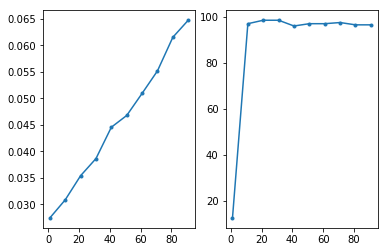

In [40]:
plt.figure(1)
t = []
m = []
rate, ends, starts = 0, 0, 0

accuracy = []
for i in range(1,100, 10):
    rate, ends, starts = 0, 0, 0
    for j in range(200):
        rate += main(i)
        ends += end
        starts += start
    accuracy.append(rate / 2)
    t.append((ends - starts)/3)
    m.append(i)
    
plt.subplot(121)  
plt.plot(m,t, ".-")
plt.subplot(122) 
plt.plot(m,accuracy,".-")
plt.draw()#注意此函数需要调用
print(accuracy)


# 实验结果

ORL数据库

图像112 * 92 

40人每人10幅图像

不同特征维数在ORL人脸数据库重的识别率比较

| 选取子空间维数 | 正确识别 | 识别率/% |
| :------------: | :------: | :------: |
|       1        |    25    |   12.5   |
|       11       |   194    |   97.0   |
|       21       |   197    |   98.5   |
|       31       |   197    |   98.5   |
|       41       |   192    |   96.0   |
|       51       |   194    |   97.0   |
|       61       |   194    |   97.0   |
|       71       |   195    |   97.5   |
|       81       |   193    |   96.5   |
|       91       |   193    |   96.5   |